In [1]:
import sys

sys.path.append('../')

import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

from straindesignxai.main import DataLoader

path = '../data/EDD_isoprenol_production.csv'
input_var = ['ACCOAC', 'MDH', 'PTAr', 'CS', 'ACACT1r', 'PPC', 'PPCK', 'PFL']
response_var = ['Value']

d = DataLoader(path, input_var, response_var)

Dataset size: (96, 9)


In [2]:
# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [5, 10, 25, 50, 100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5]
}

xgb = XGBRegressor()
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(d.X, d.y)
best_estimator = random_search.best_estimator_
best_params = random_search.best_params_
best_estimator.fit(d.X, d.y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

RMSE = 0.0338
STD = 0.0005


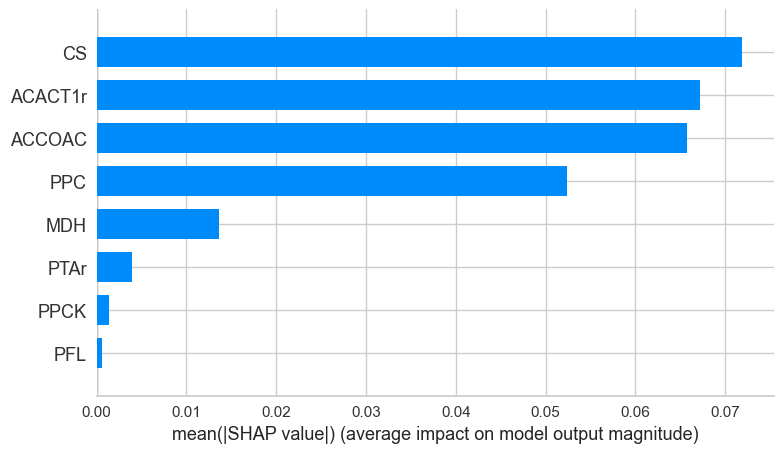

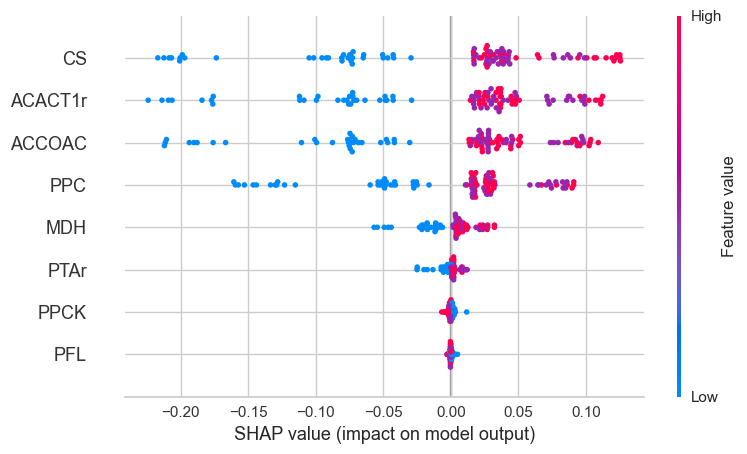

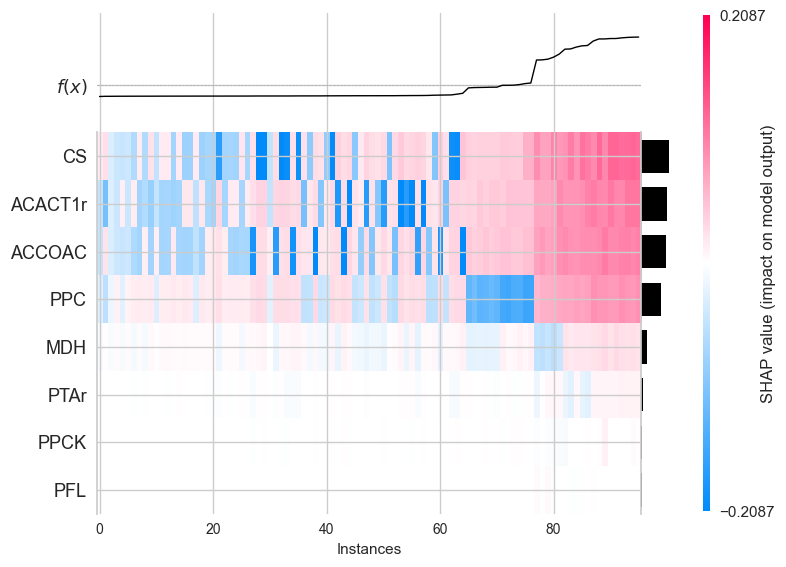

In [3]:
d.get_model(best_estimator)
d.get_shap_values()

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than

Optimal number of clusters: 6


KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


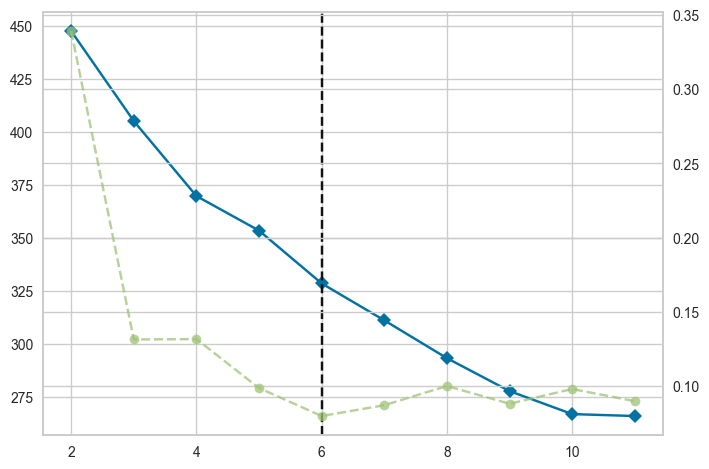

In [4]:
d.supervised_clustering()

In [5]:
d.study_clusters()

Number of elements in each cluster: 
4    23
3    20
0    19
1    13
5    12
2     9
Name: cluster, dtype: int64


,ACCOAC,MDH,PTAr,CS,ACACT1r,PPC,PPCK,PFL,Value
cluster,,,,,,,,,
0,1.473684,1.157895,1.052632,1.631579,1.368421,1.315789,1.000000,1.052632,0.489407
1,1.538462,0.846154,1.153846,1.615385,0.000000,0.923077,1.153846,1.000000,0.000000
2,1.222222,1.333333,0.666667,0.000000,1.777778,1.777778,1.222222,0.666667,0.000000
3,0.000000,1.000000,1.000000,1.450000,0.850000,1.050000,0.900000,1.100000,0.000000
4,0.826087,0.956522,0.956522,0.000000,0.826087,0.913043,1.000000,1.000000,0.000000
5,1.583333,0.750000,1.083333,1.166667,1.500000,0.000000,0.916667,1.000000,0.096391


In [7]:
d.study_clusters('most_frequent')

Number of elements in each cluster: 
4    23
3    20
0    19
1    13
5    12
2     9
Name: cluster, dtype: int64


,ACCOAC,MDH,PTAr,CS,ACACT1r,PPC,PPCK,PFL,Value
cluster,,,,,,,,,
0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,0.552101
1,2.0,0.0,2.0,2.0,0.0,0.0,2.0,2.0,0.000000
2,1.0,2.0,0.0,0.0,2.0,2.0,2.0,1.0,0.000000
3,0.0,2.0,2.0,1.0,0.0,2.0,1.0,2.0,0.000000
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000
5,2.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,0.080117


In [23]:
d.shap_df.sort_values(by='y', ascending=False)

,ACCOAC,MDH,PTAr,CS,ACACT1r,PPC,PPCK,PFL,cluster,y
6,0.103523,0.023579,0.011348,0.119357,0.112331,0.089720,0.002514,-0.001038,0,0.572648
48,0.098296,0.027210,0.009819,0.125513,0.110972,0.084620,0.003310,0.000371,0,0.572648
66,0.109043,0.032239,0.008443,0.098969,0.096926,0.085871,0.011639,0.000069,0,0.572648
45,0.102926,0.025037,0.010782,0.121757,0.111066,0.084985,0.000656,0.000515,0,0.572648
40,0.097699,0.032187,0.009347,0.125102,0.098407,0.082675,0.001501,0.000335,0,0.572648
...,...,...,...,...,...,...,...,...,...,...
42,-0.074693,0.003817,0.000975,0.017290,-0.075710,0.017637,-0.000042,-0.000322,3,0.000000
41,0.019305,0.003707,0.001526,-0.074916,-0.079284,0.018348,0.001114,-0.000255,4,0.000000
10,-0.211413,0.007428,0.002543,0.028814,0.029706,0.032223,0.001856,0.000713,3,0.000000
36,0.022549,-0.010087,0.001102,-0.095387,0.023860,-0.048343,-0.000343,-0.000017,4,0.000000


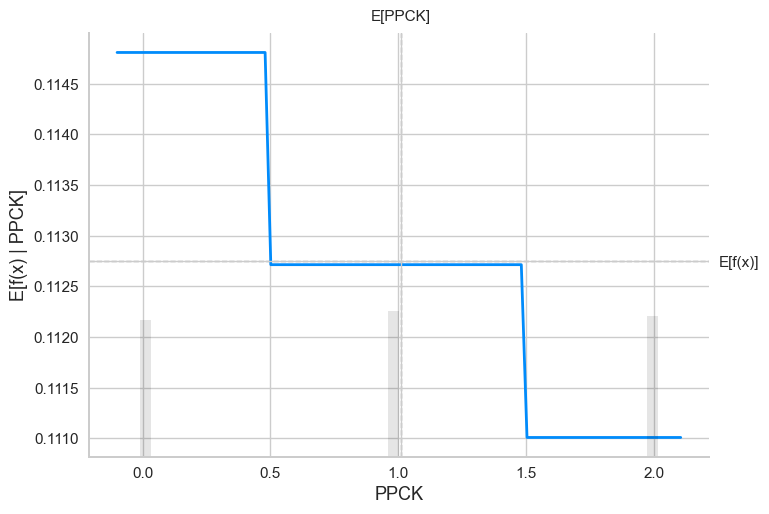

In [21]:
import shap

shap.partial_dependence_plot(
    'PPCK',
    d.model.predict,
    d.X,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True
)

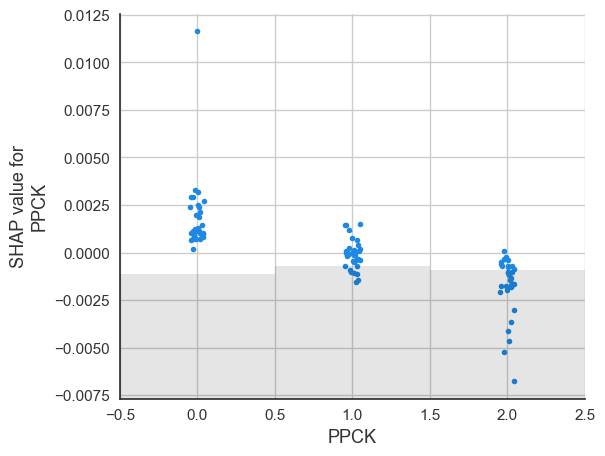

In [20]:
shap.plots.scatter(d.shap_values[:, 'PPCK'])